In [1]:
!pip cache purge # Sometimes the local cache may cause issues. You can clear the pip cache

Files removed: 1277


In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#The issue you're encountering is due to the fact that the sklearn package is deprecated. 
#Instead of pip install sklearn, you need to install scikit-learn directly. 
#!pip install sklearn

In [5]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
The error you're encountering, UnicodeDecodeError, typically occurs when the CSV file contains characters that aren't properly decoded using the default encoding (utf-8).

In [4]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Dr. Atif Khan\\NAVTAC\\Ims'

In [3]:
df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
df.shape                                             #The remainder of the set contains accented characters and symbols.


(5572, 5)

In [5]:
#Get shape and head
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [7]:

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', True) #True (default): Splits/wraps the DataFrame across multiple lines if it's too wide.
                                                    #False: Displays the DataFrame in one continuous line, regardless of width.
pd.set_option('max_colwidth',None)  #Setting max_colwidth to None removes this limit. This means Pandas will display the full content of each cell, regardless of how long the text is.
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,NaN,NaN,NaN


In [12]:
pwd

'C:\\Users\\Dr. Atif Khan\\NAVTAC\\Ims'

In [8]:
df = df.rename(columns={'v1': 'category', 'v2': 'text'})
df


,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN


In [9]:
newdf=df[['text', 'category']]
newdf

,text,category
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


Step 2: Data Analysis<br>
1. Check for Missing Values: It’s essential to check if there are any missing values in your DataFrame.
2. Class Distribution: Check how many messages are "ham" and how many are "spam."

In [4]:
#number of missing values (NaN or None) in each column of the DataFrame df.
print(newdf['text'].isnull().sum(axis=0)) 

0


In [5]:
print(newdf.isnull().sum())


text        0
category    0
dtype: int64


In [14]:
#Class Distribution: Check how many messages are "ham" and how many are "spam."
#prints the frequency (count) of each unique value in the 'Label' column of the DataFrame df.
print(df['category'].value_counts())


category
ham     4825
spam     747
Name: count, dtype: int64


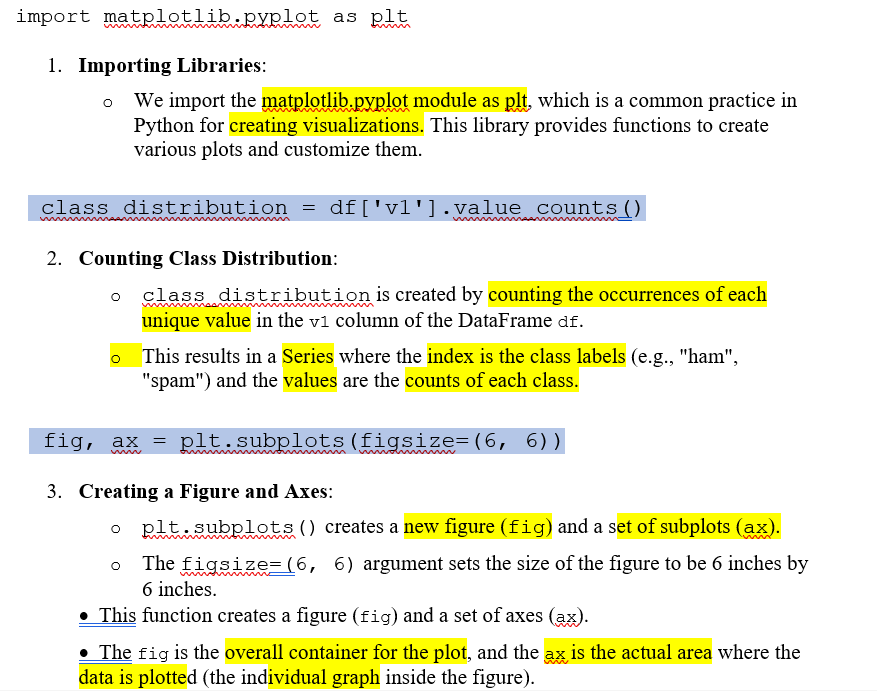
The ax object is used later to plot the bars using the ax.bar() method.
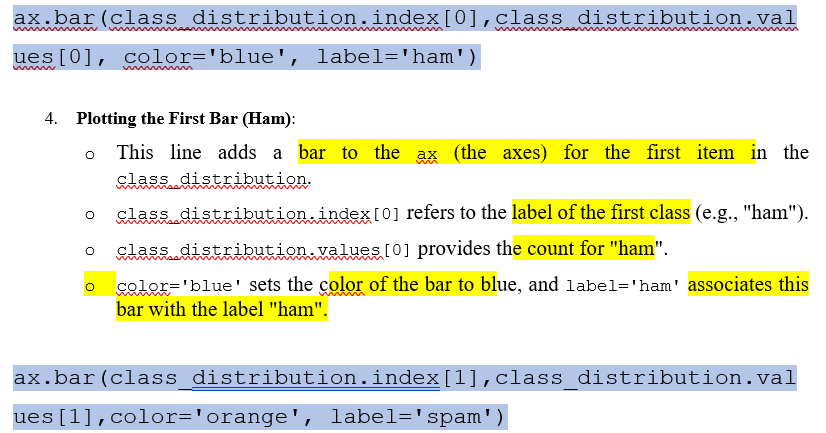
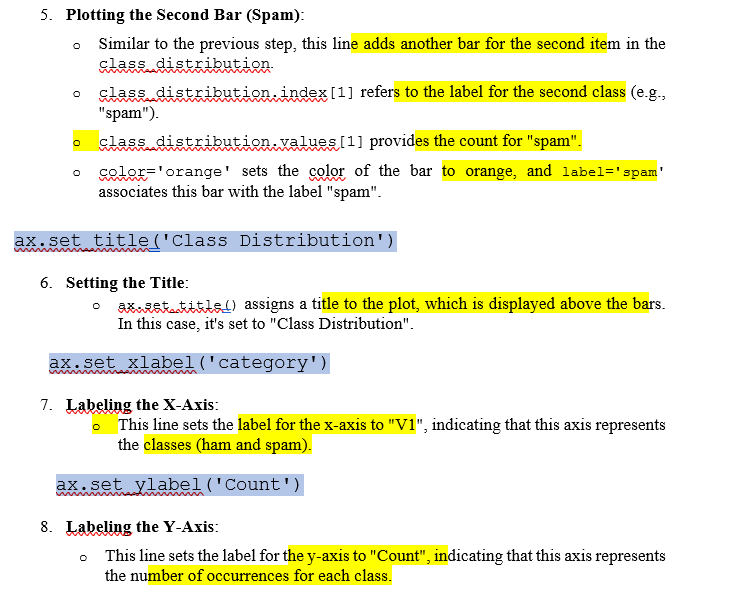
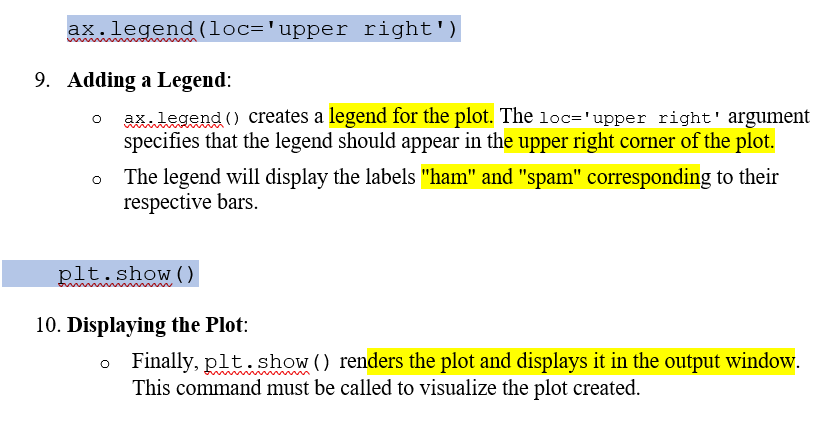


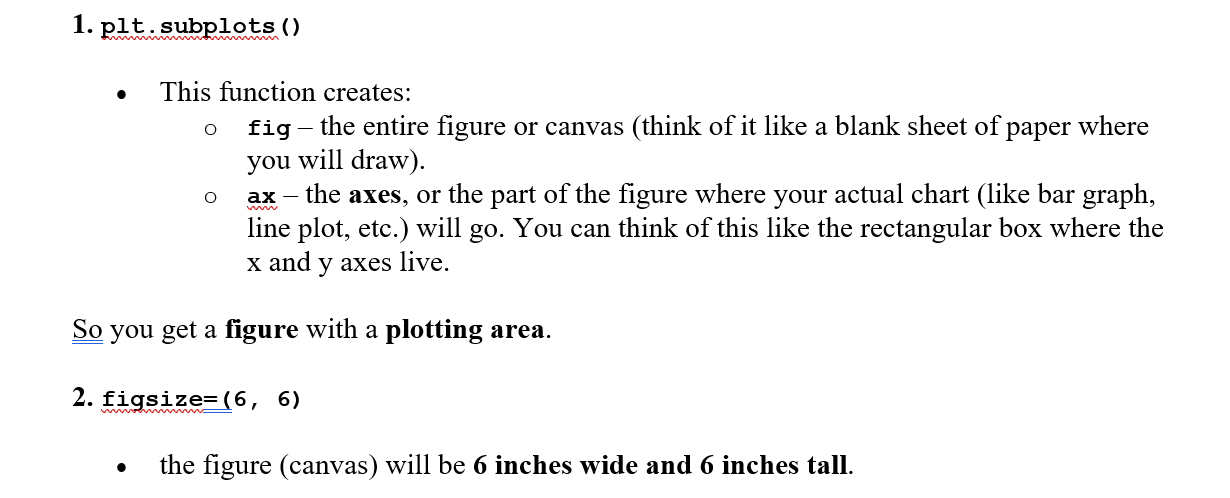
This creates a blank figure (canvas) and a set of axes (where the plot will appear).

figsize=(6, 6) sets the size of the plot (6 inches by 6 inches).

In [ ]:
!pip install matplotlib

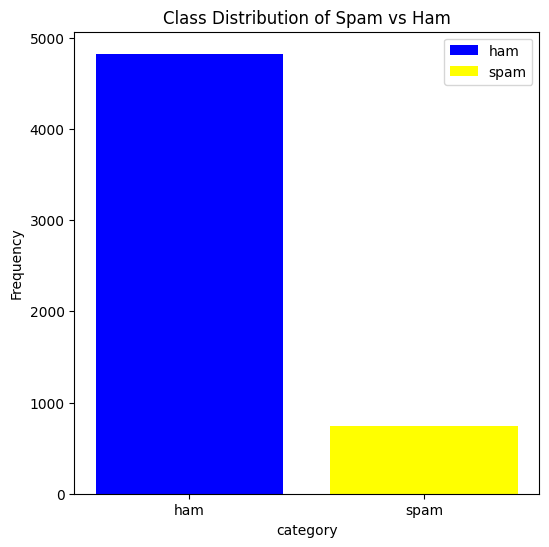

In [6]:
#The legend is the small box (usually on the side or top of the graph) with labels "Ham" and "Spam" 
#showing the color associated with each class.

import matplotlib.pyplot as plt #library, which is used to create charts and plots in Python

# Bar Plot for Class Distribution
#This counts how many times each category (like "ham" and "spam") appears in the 'category' column of the DataFrame newd
class_distribution = newdf['category'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each bar separately to associate them with labels
#Draws a blue bar for the first category (likely 'ham') using its count.
ax.bar(class_distribution.index[0], class_distribution.values[0], color='blue', label='ham')
#Draws a yellow bar for the first category (likely 'spam') using its count.
ax.bar(class_distribution.index[1], class_distribution.values[1], color='yellow', label='spam')

# Add title and labels
ax.set_title('Class Distribution of Spam vs Ham')
ax.set_xlabel('category')
ax.set_ylabel('Frequency')

# Add a legend with the correct labels
ax.legend(loc='upper right')

# Show the plot
plt.show()

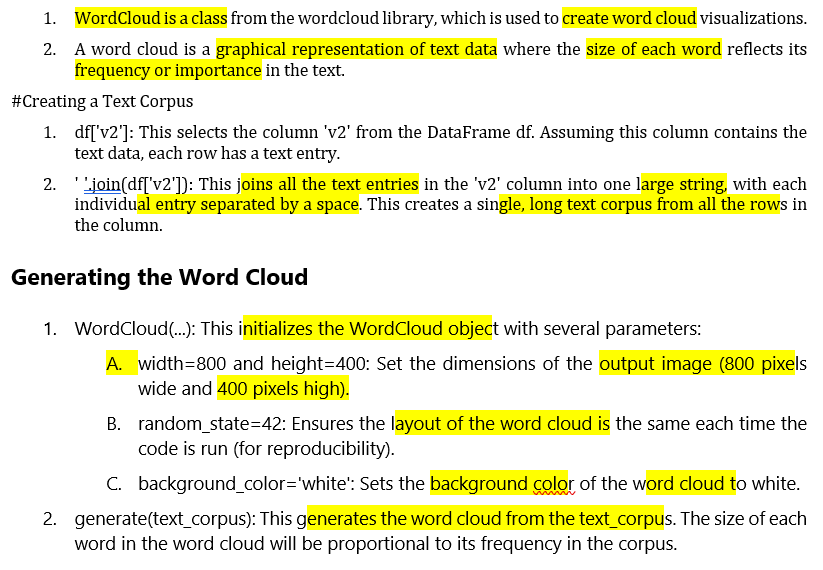

In [17]:
newdf['text'].head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: text, dtype: object

In [18]:
' '.join(newdf['text'].head(10))

"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R ent

In [9]:
df.head(2)

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [8]:
' '.join(newdf['text'].head(2))

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni...'

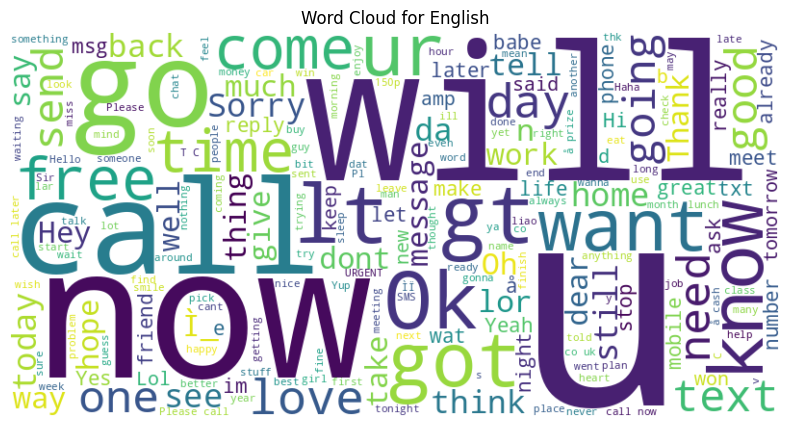

In [10]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

text_corpus = ' '.join(newdf['text'])

wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_corpus)

# #This creates a new figure (or canvas) for the plot, with a size of 10 inches by 5 inches.
#This function is used to create a new figure(or the overall space where the plot will be drawn) or plotting area.
plt.figure(figsize=(10, 5))


##This displays the word cloud image. The wordcloud object contains the graphical representation of the word cloud.
#interpolation='bilinear': This smooths the image when it is displayed, making the word cloud appear less pixelated.
plt.imshow(wordcloud, interpolation='bilinear') 

##his removes the axis from the plot, so no axis lines or labels are shown
plt.axis('off')

##Adds a title to the plot, in this case, "Word Cloud for Text."
plt.title('Word Cloud for English')

# Displays the plot with the word cloud.
plt.show()

1. Step 3: Text Preprocessing
2. Before you can use this data for modeling, you typically need to preprocess the text data. Common steps include:

3. Lowercasing
4. Removing punctuation
5. Removing stop words
6. Tokenization
7. Converting text to numerical features (e.g., using Bag of Words or TF-IDF)

In [32]:
s=r'\n'
print(s)
t= '\n'
print(t)

\n




In [15]:
import re
text='&&&&&akhtar age is 14 and??? saeed age is 15 are %%%friends but they usually++++++++disagree on certain matters'
text1=re.sub(r'[^a-zA-Z0-9\s]', '', text)
text1=text1.split(" ")
text1

['akhtar',
 'age',
 'is',
 '14',
 'and',
 'saeed',
 'age',
 'is',
 '15',
 'are',
 'friends',
 'but',
 'they',
 'usuallydisagree',
 'on',
 'certain',
 'matters']